In [1]:
# import all functions in Utils
import sys
sys.path.insert(1, '../')

from Utils import *

# Create folders to save the results
output = 'output'
folder_img = 'IMG'

create_dir(output)
create_dir(folder_img)


n_shots = 8192

The directory output  already exists
The directory IMG  already exists


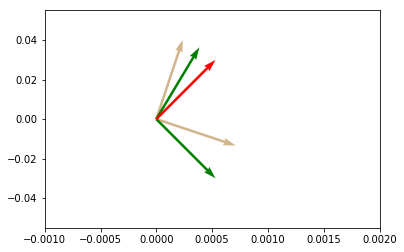

In [2]:
''' State Preparation'''

## ++++++++++++++++++++++++++++++++++ ##
y_class0 = [1, 0]
y_class1 = [0, 1]

# Training Set
x1_train = [3,   -1] ; x1_train = normalize_custom(x1_train) # y2 = '1'
x2_train = [1,    3] ; x2_train = normalize_custom(x2_train) # y1 = '0'
x3_train = [2,   -2] ; x3_train = normalize_custom(x3_train) # y4 = '1'
x4_train = [1.5, 2.5]; x4_train = normalize_custom(x4_train) # y3 = '0'

D = [x1_train, x2_train, x3_train, x4_train]

x_test = [2, 2]; x_test = normalize_custom(x_test)

V = np.array([ x1_train, x2_train, x3_train, x4_train, x_test])
origin = [0], [0] # origin point
plt.quiver(*origin, V[:,0], V[:,1], color=['tan','tan','g', 'g', 'red'], scale = 4)
plt.xlim(-0.001,0.002)
plt.show()

In [3]:
'''Single classifiers'''

qc1 = cos_classifier( x1_train, x_test, y_class1 )
qc2 = cos_classifier( x2_train, x_test, y_class0 )
qc3 = cos_classifier( x3_train, x_test, y_class1 )
qc4 = cos_classifier( x4_train, x_test, y_class0 )
qc_ens =  qc_ensemble_full(D, x_test)
qc_ens_v2 = qc_ensemble_v2(D, x_test)

In [ ]:
## Classifier 1
r1 = exec_simulator(qc1)
save_dict( r1, name = 'c1' )

In [ ]:
## Classifier 2
r2 = exec_simulator(qc2)
save_dict( r2, name = 'c2' )

In [ ]:
## Classifier 3
r3 = exec_simulator(qc3)
save_dict( r3, name = 'c3' )

In [ ]:
## Classifier 4
r4 = exec_simulator(qc4)
save_dict( r4, name = 'c4' )

In [ ]:
## Ensemble original
r_ens = exec_simulator(qc_ens)
save_dict( r_ens, name = 'ensemble' )

In [ ]:
## Ensemble v2
r_ens_v2 = exec_simulator(qc_ens_v2)
save_dict( r_ens_v2, name = 'ensemble_v2' )

In [ ]:
#diagram = 
qc_ens_v2.draw(output="mpl")

In [ ]:
print(r1, r2, r3, r4, r_ens, r_ens_v2)

# Circuits to run
#### 1) Weak classifiers:
    qc1, qc2, qc3, qc4
#### 2) Quantum ensemble of the 4 classifiers using forking:
    qc_ens
#### 3) Quantum ensemble version 2:
    qc_ens_v2

In [ ]:
qc_t1 = transpile([qc1]*1000, backend_b,optimization_level=1)
qc_t2 = transpile([qc]*1000, backend_b,optimization_level=2)
qc_t3 = transpile([qc]*1000, backend_b,optimization_level=3)

In [ ]:
qf_ncx1 = [c.count_ops()['cx'] for c in qc_t1]
qf_ncx2 = [c.count_ops()['cx'] for c in qc_t2]
qf_ncx3 = [c.count_ops()['cx'] for c in qc_t3]

In [ ]:
# check the number of cx gates
print('Opt of lv 1: Minimum # of cx gates = %s' % min(qf_ncx1))
print('Opt of lv 1: The best circuit is the circut %s' % qf_ncx1.index(min(qf_ncx1)))

# check the number of cx gates
print('Opt of lv 2: Minimum # of cx gates = %s' % min(qf_ncx2))
print('Opt of lv 2: The best circuit is the circut %s' % qf_ncx2.index(min(qf_ncx2)))

# check the number of cx gates
print('Opt of lv 3: Minimum # of cx gates = %s' % min(qf_ncx3))
print('Opt of lv 3: The best circuit is the circut %s' % qf_ncx3.index(min(qf_ncx3)))

In [ ]:
opt_qc = qc_t3[qf_ncx3.index(min(qf_ncx3))]

In [ ]:
opt_qc

In [ ]:
qc_DIR

In [ ]:
qc_OPT

In [ ]:
job = execute(opt_qc, backend_b, shots=8192)

In [ ]:
job.status()

In [ ]:
job.job_id()